## **UNSUPERVISED MACHINE LEARNING WORKSHOP 2**

### **1. Research about the Spectral Clustering method, and answer the following questions:**

- In which cases might it be more useful to apply?

When we have some specific shapes in our data, because Spectral Clustering makes no assumption on the shapes of clusters, and can handle complex shapes.

- What are the mathematical fundamentals of it?

Construct a similarity graph for all the data points (adjency matrix). Embed data points in a low-dimensional space (spectral embedding), in which the clusters are more obvious, with the use of eigenvectors of the graph Laplacian. A classical clustering algorithm is applied to partition the embedding.

- What is the algorithm to compute it?

KNN (k-nearest neighbor)

- Does it hold any relation to some of the concepts previously mentioned in class? Which, and how?

Sure, we compute eigenvalues and eigenvectors because we need to make an eigenvalue decomposition of the graph Laplacian Matrix 

### **2. Research about the DBSCAN method, and answer the following questions:**

- In which cases might it be more useful to apply?
- What are the mathematical fundamentals of it?
- Is there any relation between DBSCAN and Spectral Clustering? If so, what is it?


### **3. What is the elbow method in clustering? And which flaws does it pose to assess quality?**

### **4. Remember the unsupervised Python package from unsupervised machine learning workshop2? It’s time for an upgrade**

- Implement the k-means module using Python and Numpy
- Implement the k-medoids module using Python and Numpy
- Remember to keep consistency with Scikit-Learn API as high as possible

For this, you can check the implementation in this file: lib/utils.py

### **5. Let’s use the newly created modules in unsupervised to cluster some toy data.**

- ### Use the sklearn.datasets.make_blobs to create scattered data X

In [1]:
from sklearn.datasets import make_blobs
import numpy as np

X, y = make_blobs(
n_samples=500,
n_features=2,
centers=4,
cluster_std=1,
center_box=(-10.0, 10.0),
shuffle=True,
random_state=1,
)

print(f"Shape of  X: {X.shape}, shape of y: {y.shape}")

Shape of  X: (500, 2), shape of y: (500,)


-  ### Plot the resulting dataset. How many clusters are there? How far are they from one another?


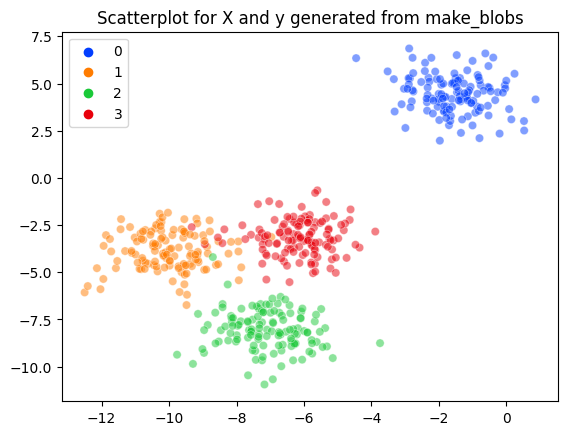

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.title('Scatterplot for X and y generated from make_blobs')
sns.scatterplot(x=X[:,0], y = X[:,1], hue = y, alpha = 0.5, palette='bright')
plt.legend()
plt.show()

Clusters 1, 2, 3 are closer to each other and both are far from cluster 0

- ### For both k-means and k-medoids (your implementations), calculate the silhouette plots and coefficients for each run, iterating K from 1 to 5 clusters.

Let's start by KMeans

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5640395813218549
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.555806786741096


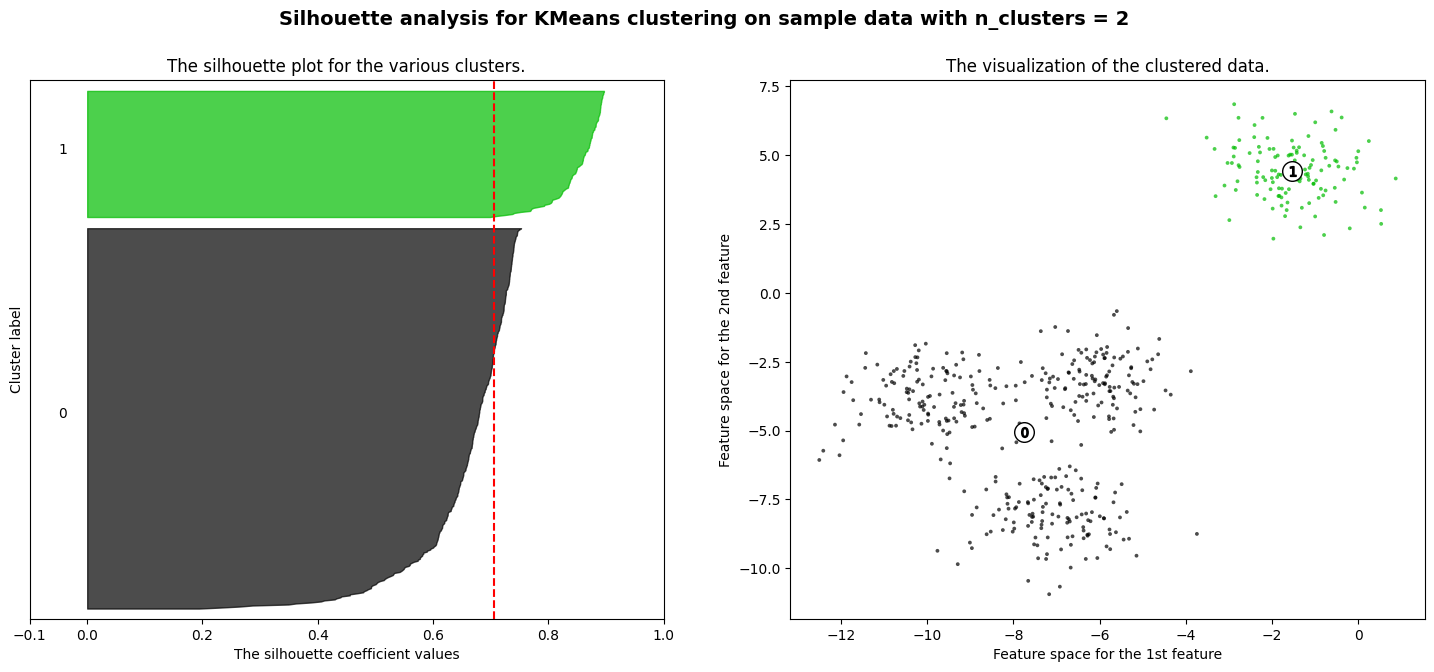

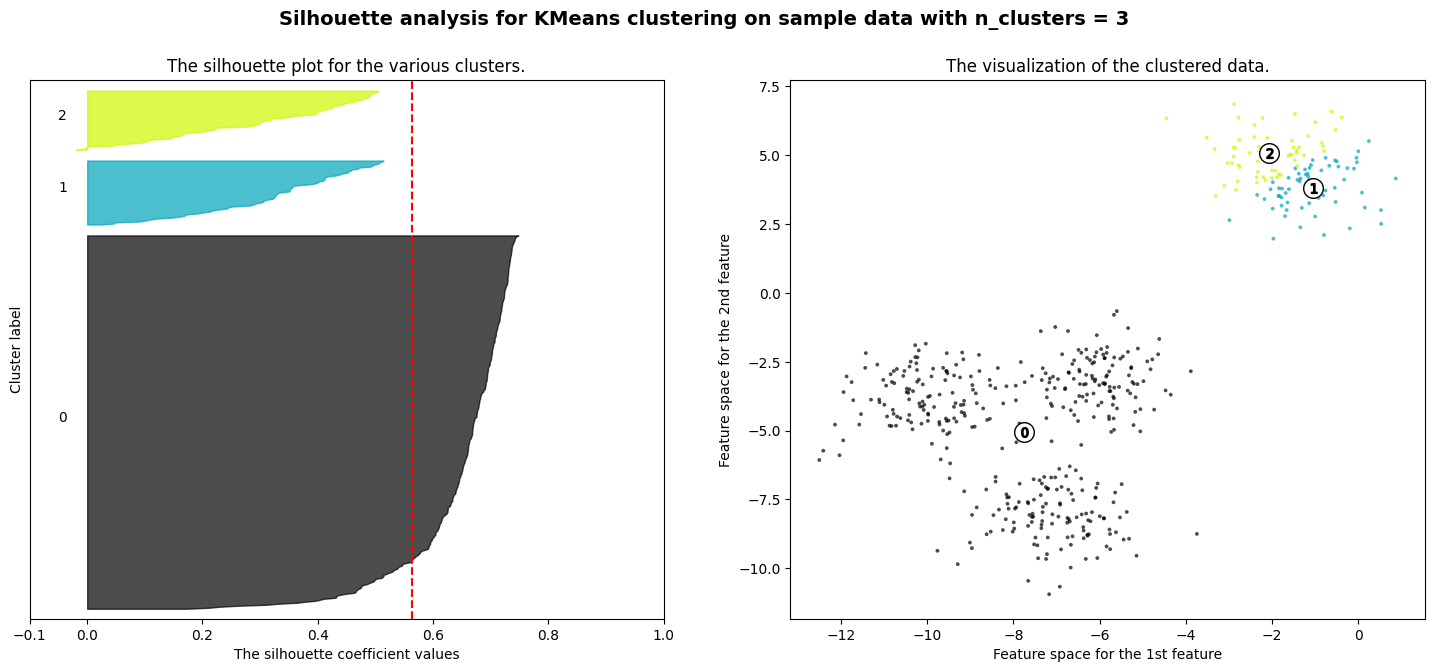

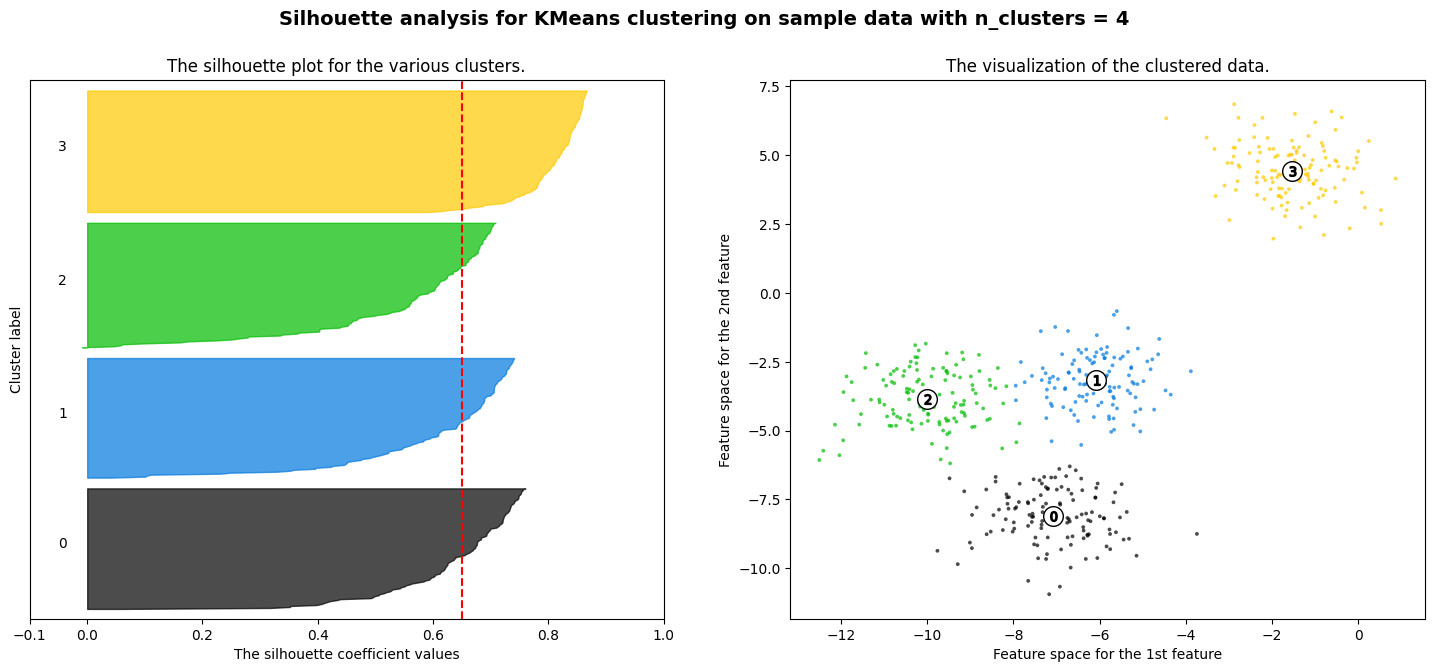

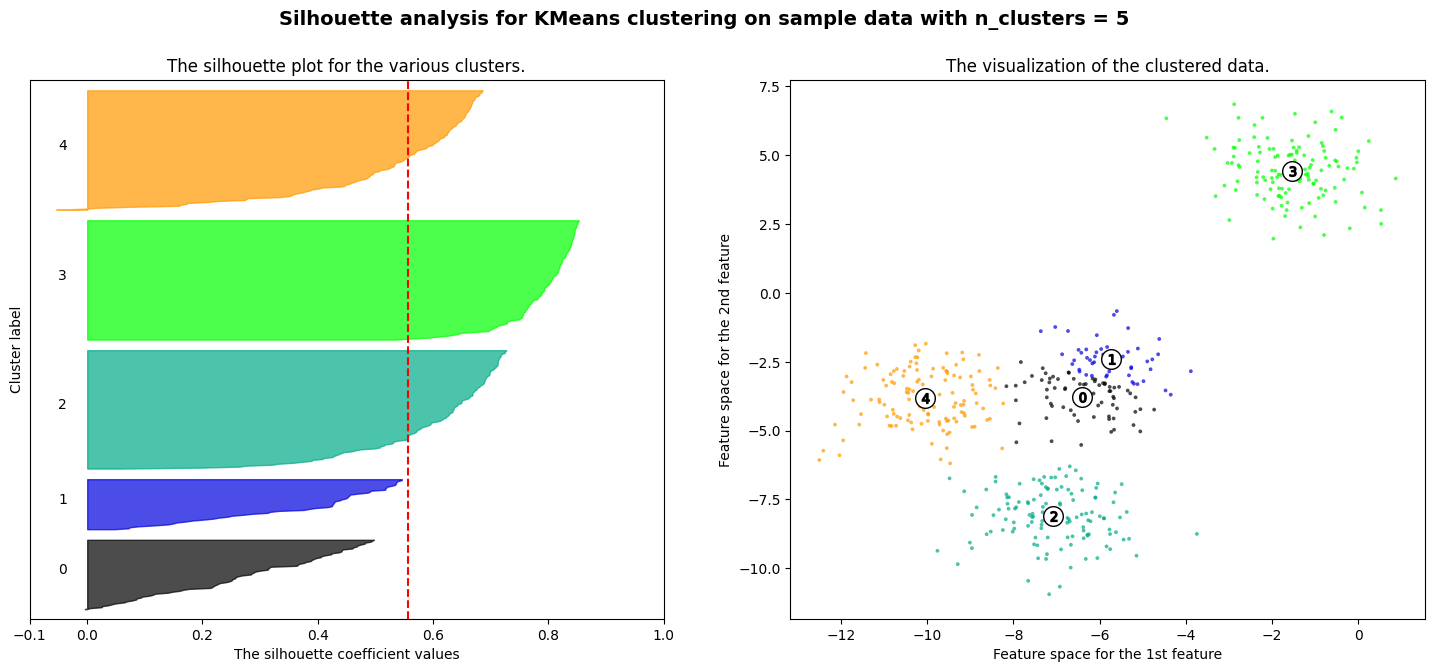

In [3]:
from lib.utils import plot_silohuettes

# see lib/utils.py, plot_silohuettes can receive between KMeans and KMedoids as parameters, and will use the implementation from scratch from both 
# that are located in lib.utils, and will plot the silohuette plot for a given range of clusters to iterate

plot_silohuettes(range_n_clusters=[2,3,4,5], X= X, method='KMeans')

Now, KMedoids

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5873430979447513
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5244520427457041


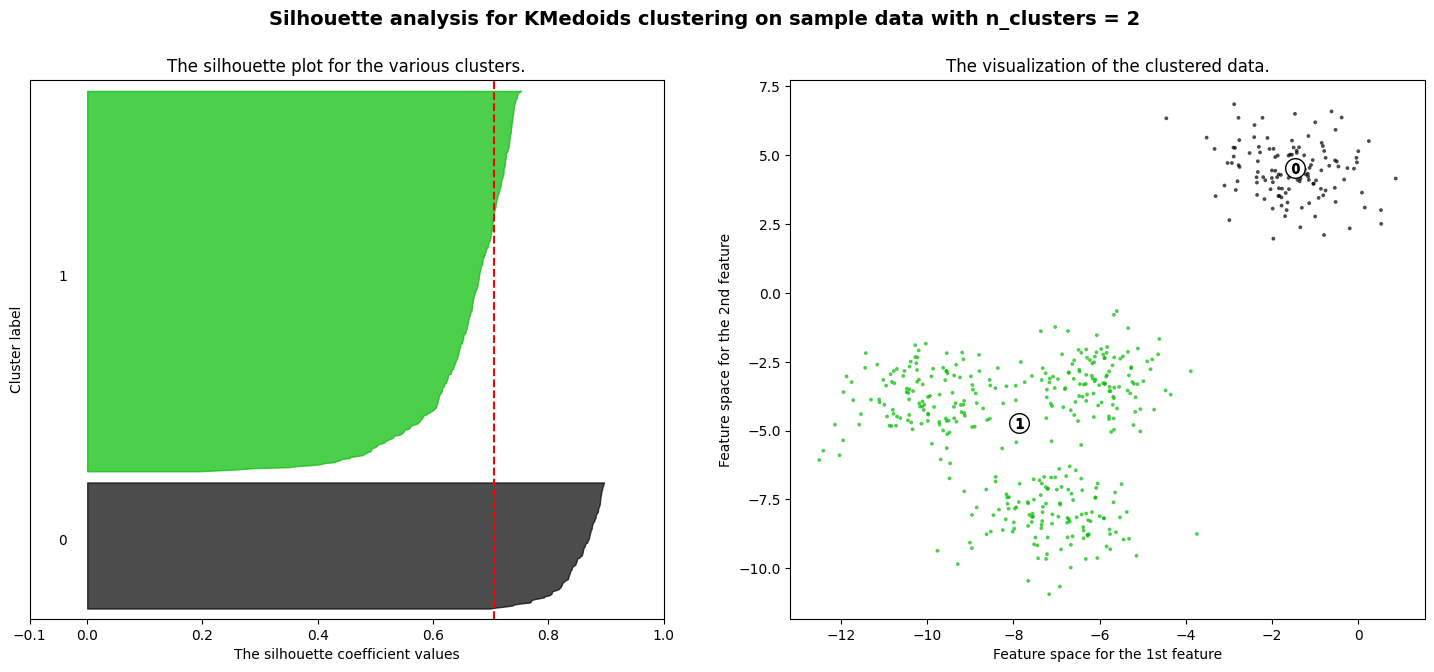

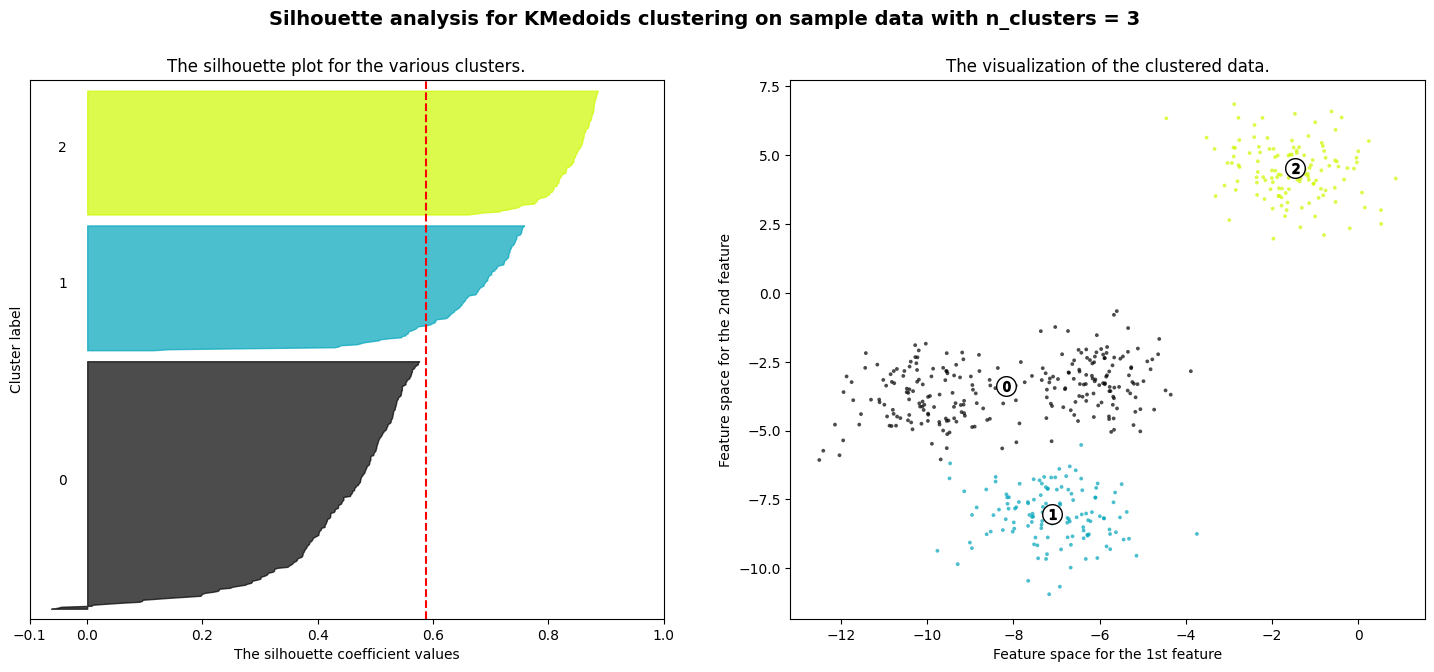

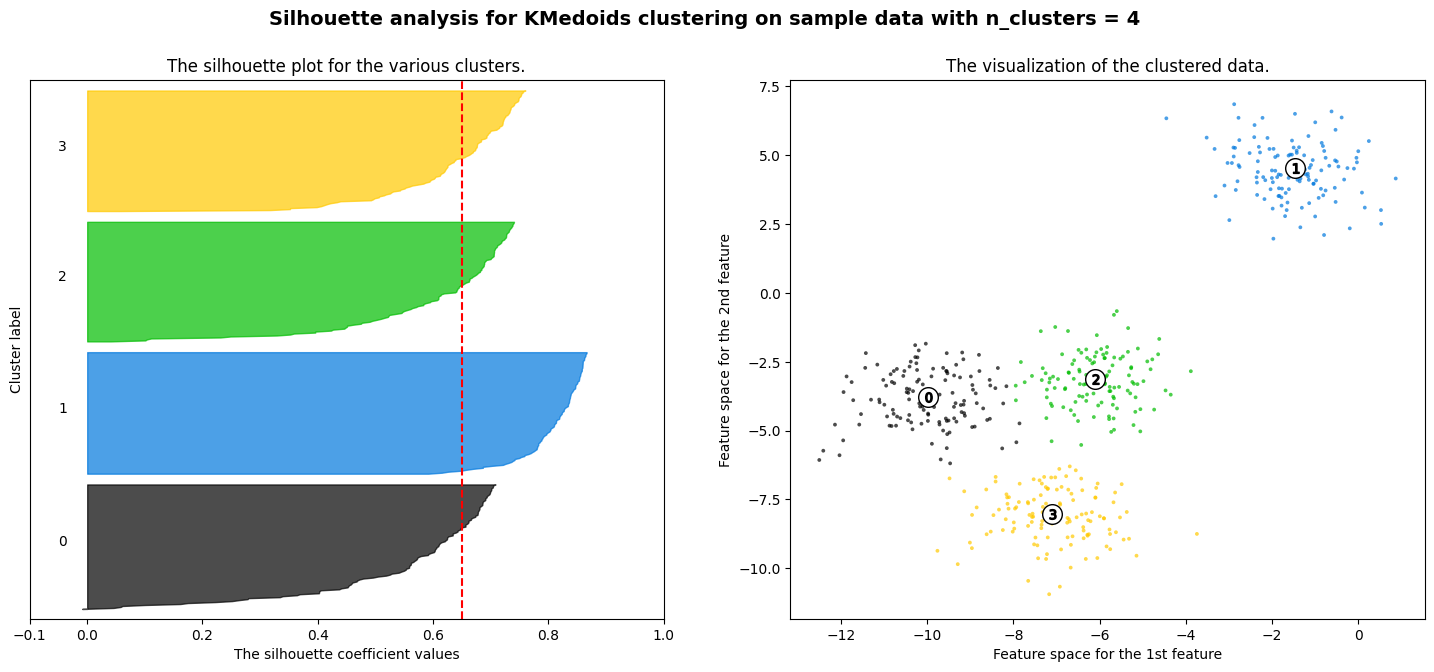

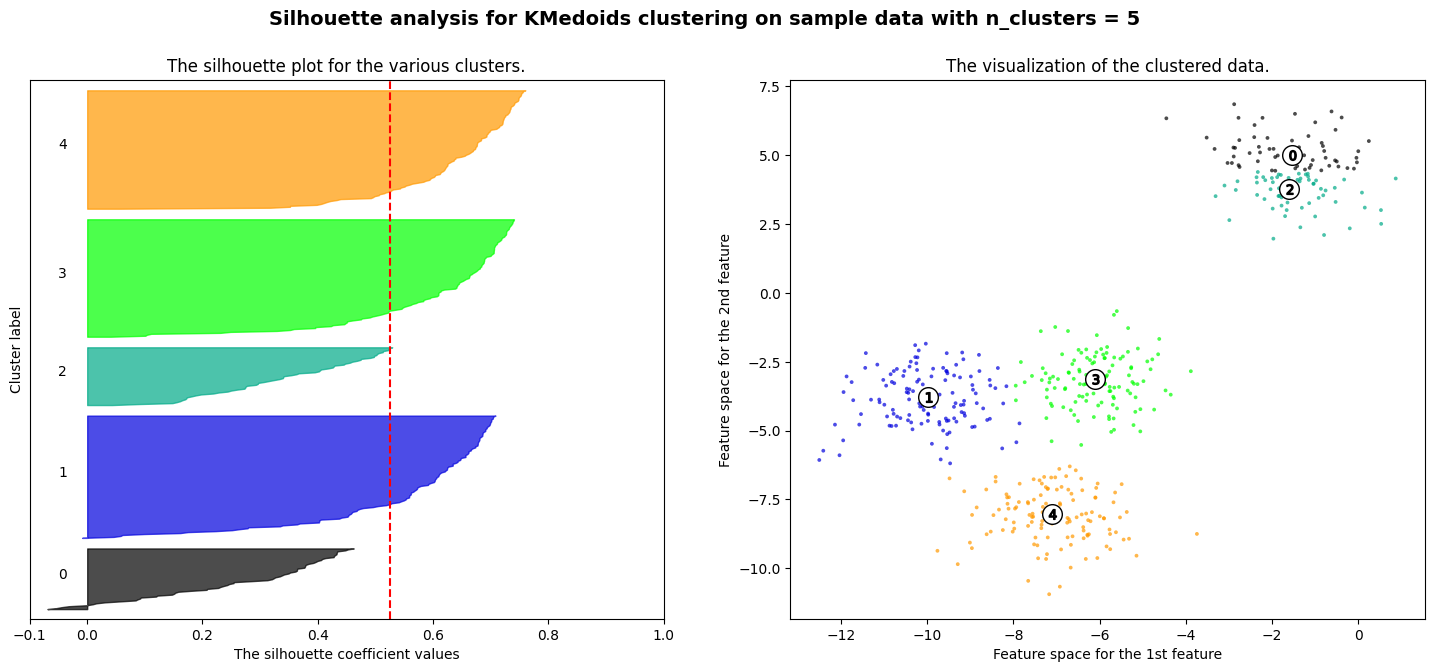

In [4]:
plot_silohuettes(range_n_clusters=[2,3,4,5], X= X, method='KMedoids')

In both cases, n_clusters = 2 had the best score and is acceptable because the 2 clusters are very separated, but we can also define 4 clusters and have more segmentation that can be useful for analysis, business, etc...

Anyway, n_clusters = 4 was the second best score, and is the nature from the parameters to create the synthetic dataset.

Respect to the figures, we can observe that in both methods when n_clusters = [3,5] were not points upper the threshold (average silhouette score)

### **6. With the following code we are going to create different types of scattered data:**

In [5]:
from sklearn import datasets
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None


# Anisotropically distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
# blobs with varied variances
varied = datasets.make_blobs(
n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

- #### Plot the different datasets in separate figures. What can you say about them?

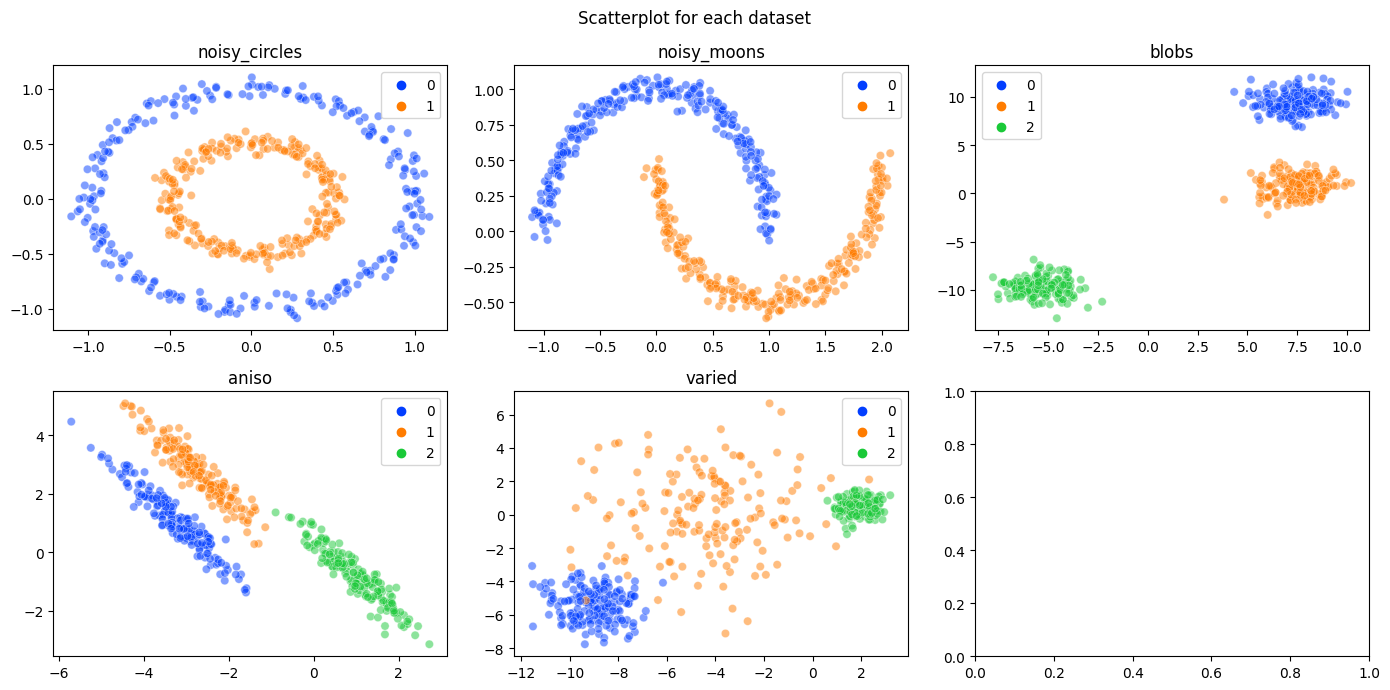

In [6]:
fig, axes = plt.subplots(2,3, figsize= (14,7))
datasets_names = ['noisy_circles', 'noisy_moons', 'blobs', 'aniso', 'varied']
datasets = [noisy_circles, noisy_moons, blobs, aniso, varied]
fig.suptitle('Scatterplot for each dataset')

i = 0
for row in range(2):
    for col in range(3):
        try:
            axes[row,col].set_title(datasets_names[i])
            sns.scatterplot(x = datasets[i][0][:,0], y = datasets[i][0][:,1], hue = datasets[i][1], alpha = 0.5, palette='bright', ax = axes[row,col])
            axes[row,col].legend()
            i += 1
        except:
            pass
    plt.tight_layout()
plt.show()


- #### Apply k-means, k-medoids, DBSCAN and Spectral Clustering from Scikit-Learn over each dataset and compare the results of each algorithm with respect to each dataset.


In [7]:
# let's transform our datasets to pandas dataframes, to make eaiser the way to store results from all clustering methods

import pandas as pd

[noisy_circles, noisy_moons, blobs, aniso, varied]

noisy_circles_df = pd.DataFrame(noisy_circles[0], columns=['x', 'y'])
noisy_circles_df['real_label'] = noisy_circles[1]

noisy_moons_df = pd.DataFrame(noisy_moons[0], columns=['x', 'y'])
noisy_moons_df['real_label'] = noisy_moons[1]

blobs_df = pd.DataFrame(blobs[0], columns=['x', 'y'])
blobs_df['real_label'] = blobs[1]

aniso_df = pd.DataFrame(aniso[0], columns=['x', 'y'])
aniso_df['real_label'] = aniso[1]

varied_df = pd.DataFrame(varied[0], columns=['x', 'y'])
varied_df['real_label'] = varied[1]

datasets_df = [noisy_circles_df, noisy_moons_df, blobs_df, aniso_df, varied_df]
datasets_df_names = ['noisy_circles_df', 'noisy_moons_df', 'blobs_df', 'aniso_df', 'varied_df']

In [8]:
from sklearn import cluster 
from sklearn_extra import cluster as cluster2
import warnings
warnings.filterwarnings('ignore')

# Take the number of clusters defined in the nature of the dataset generation to 
n_clusters_datasets = [len(np.unique(dataset['real_label'])) for dataset in datasets_df]
clusterers = [cluster.KMeans, cluster2.KMedoids, cluster.DBSCAN, cluster.SpectralClustering]


for dataset, n_clusters in zip(datasets_df, n_clusters_datasets):
    for clusterer in clusterers:
        if clusterer.__name__ in ['DBSCAN']:
            cluster_generator =  clusterer(eps = 0.15)
            dataset[str(cluster_generator).replace('(eps=0.15)','').lower()+'_label'] = cluster_generator.fit_predict(dataset[['x','y']])
        elif clusterer.__name__ in ['SpectralClustering']:
            cluster_generator =  clusterer(n_clusters = n_clusters,affinity="nearest_neighbors")            
            dataset[str(cluster_generator).replace("(affinity='nearest_neighbors', n_clusters="+str(n_clusters)+")","").lower()+"_label"] = cluster_generator.fit_predict(dataset[['x','y']])
        else:
            cluster_generator =  clusterer(n_clusters = n_clusters)
            dataset[str(cluster_generator).replace('(n_clusters='+str(n_clusters)+')','').lower()+'_label'] = cluster_generator.fit_predict(dataset[['x','y']])

# Let's see how the dataframes look afte the process
# for dataset, dataset_name in zip(datasets_df, datasets_df_names):
#     print(f"The dataset {dataset_name} has this columns: {dataset.columns.tolist()}")

#### Now let's plot the different clusters for noisy_circles

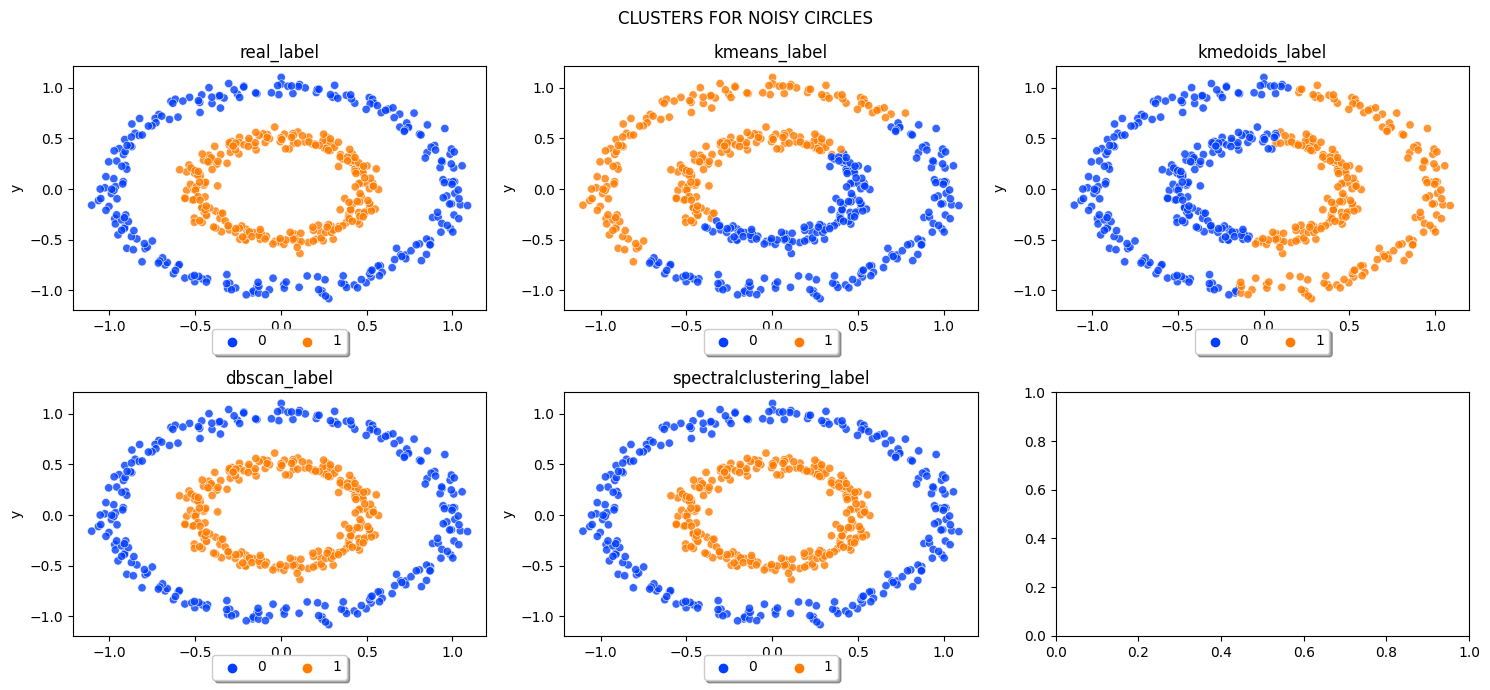

In [9]:
fig, axes = plt.subplots(2,3, figsize = (15,7))
fig.suptitle('Clusters for noisy circles'.upper())

cluster_labels = ['real_label', 'kmeans_label', 'kmedoids_label', 'dbscan_label', 'spectralclustering_label']
i = 0
for row in range(2):
    for col in range(3):
        try:
            axes[row, col].set_title(cluster_labels[i])
            sns.scatterplot(data = noisy_circles_df, x = 'x', y = 'y', hue = cluster_labels[i], alpha = 0.8, palette='bright', ax = axes[row, col])
            axes[row,col].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
            i += 1
        except:
            pass
    plt.tight_layout()
plt.show()

#### Now for noisy_moons_df

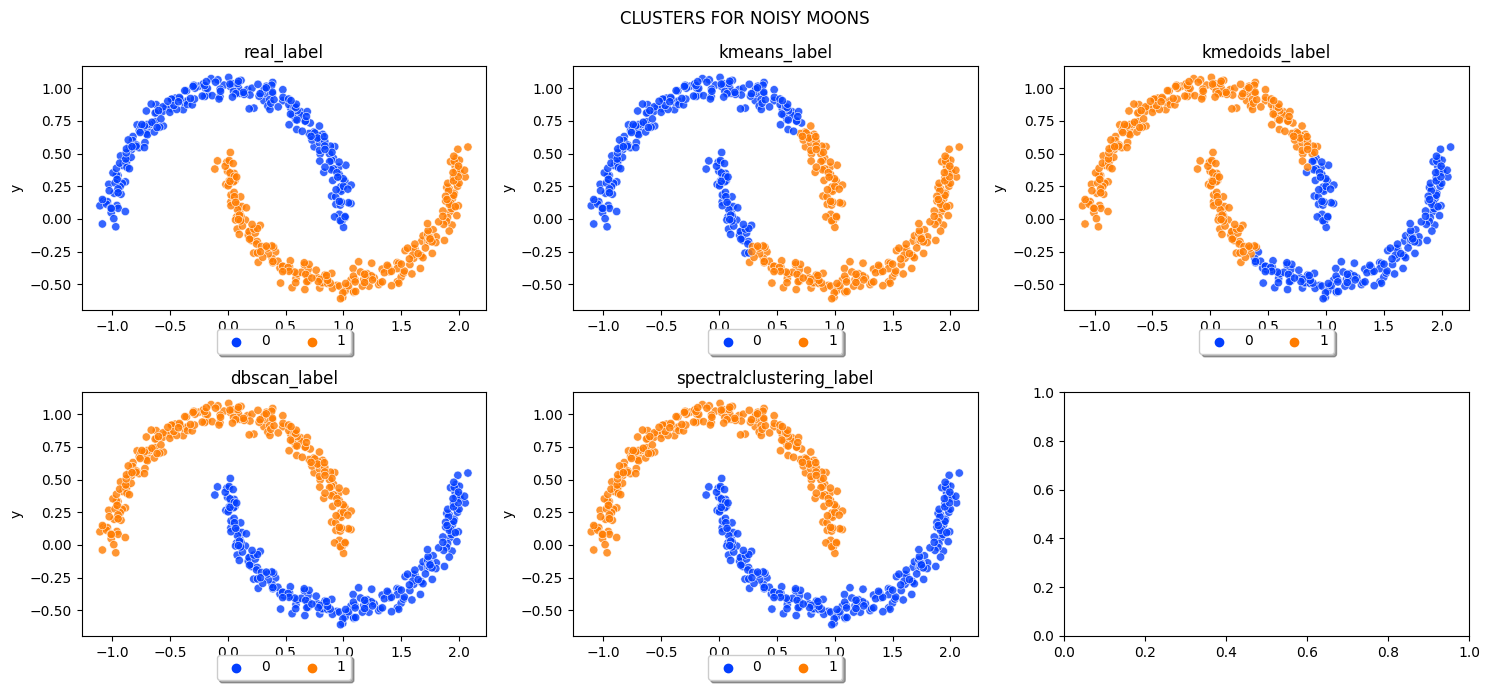

In [10]:
fig, axes = plt.subplots(2,3, figsize = (15,7))
fig.suptitle('Clusters for noisy moons'.upper())
cluster_labels = ['real_label', 'kmeans_label', 'kmedoids_label', 'dbscan_label', 'spectralclustering_label']
i = 0
for row in range(2):
    for col in range(3):
        try:
            axes[row, col].set_title(cluster_labels[i])
            sns.scatterplot(data = noisy_moons_df, x = 'x', y = 'y', hue = cluster_labels[i], alpha = 0.8, palette='bright', ax = axes[row, col])
            axes[row,col].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
            i += 1
        except:
            pass
    plt.tight_layout()
plt.show()

#### Now for blobs_df

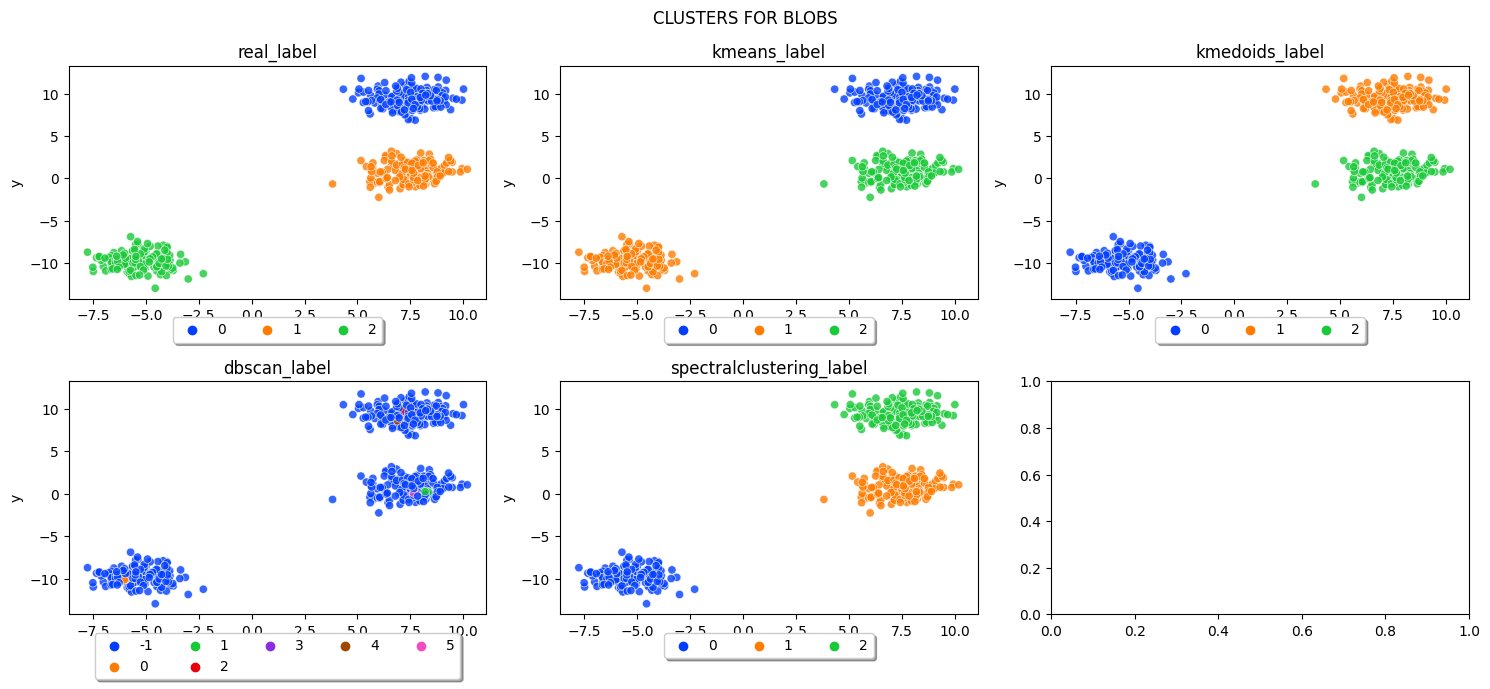

In [11]:
fig, axes = plt.subplots(2,3, figsize = (15,7))
fig.suptitle('Clusters for blobs'.upper())

cluster_labels = ['real_label', 'kmeans_label', 'kmedoids_label', 'dbscan_label', 'spectralclustering_label']
i = 0
for row in range(2):
    for col in range(3):
        try:
            axes[row, col].set_title(cluster_labels[i])
            sns.scatterplot(data = blobs_df, x = 'x', y = 'y', hue = cluster_labels[i], alpha = 0.8, palette='bright', ax = axes[row, col])
            axes[row,col].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
            i += 1
        except:
            pass
    plt.tight_layout()
plt.show()

#### Now for aniso

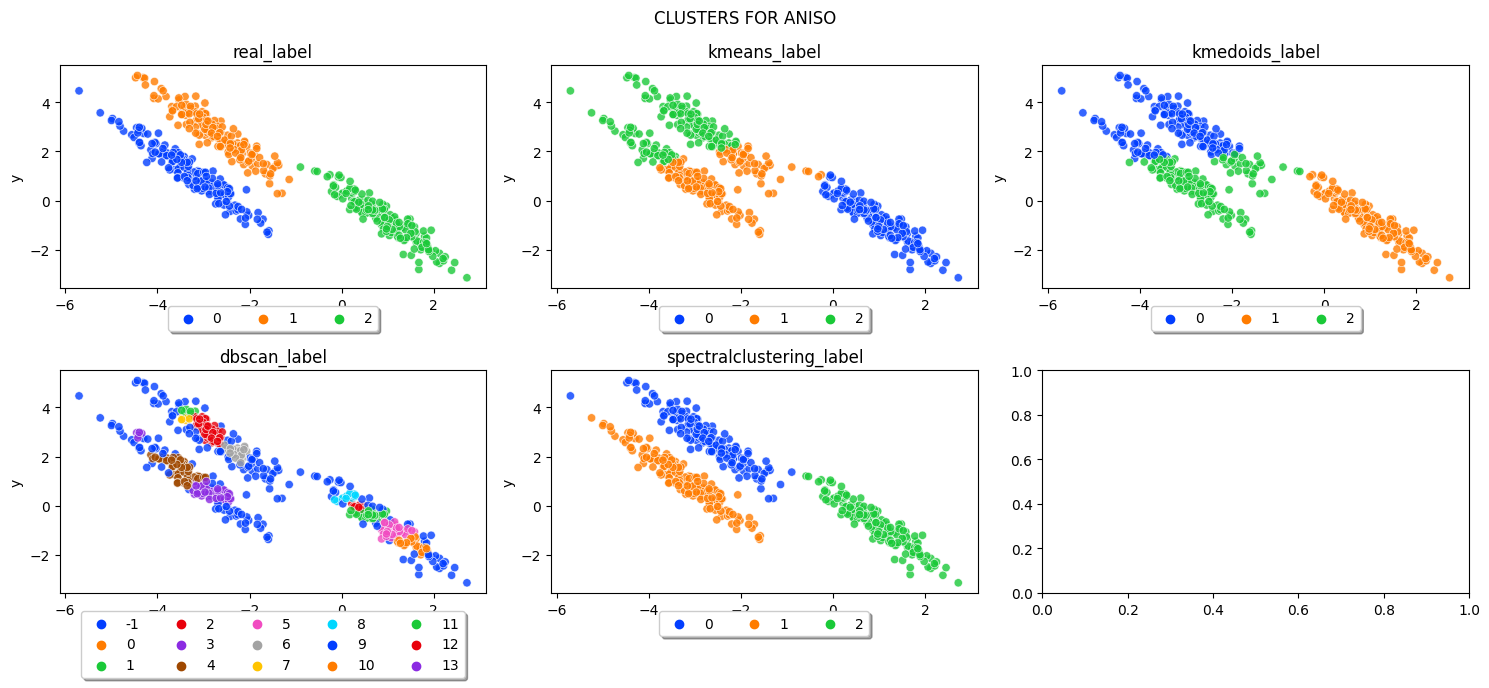

In [12]:
fig, axes = plt.subplots(2,3, figsize = (15,7))
fig.suptitle('Clusters for aniso'.upper())

cluster_labels = ['real_label', 'kmeans_label', 'kmedoids_label', 'dbscan_label', 'spectralclustering_label']
i = 0
for row in range(2):
    for col in range(3):
        try:
            axes[row, col].set_title(cluster_labels[i])
            sns.scatterplot(data = aniso_df, x = 'x', y = 'y', hue = cluster_labels[i], alpha = 0.8, palette='bright', ax = axes[row, col])
            axes[row,col].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
            i += 1
        except:
            pass
    plt.tight_layout()
plt.show()

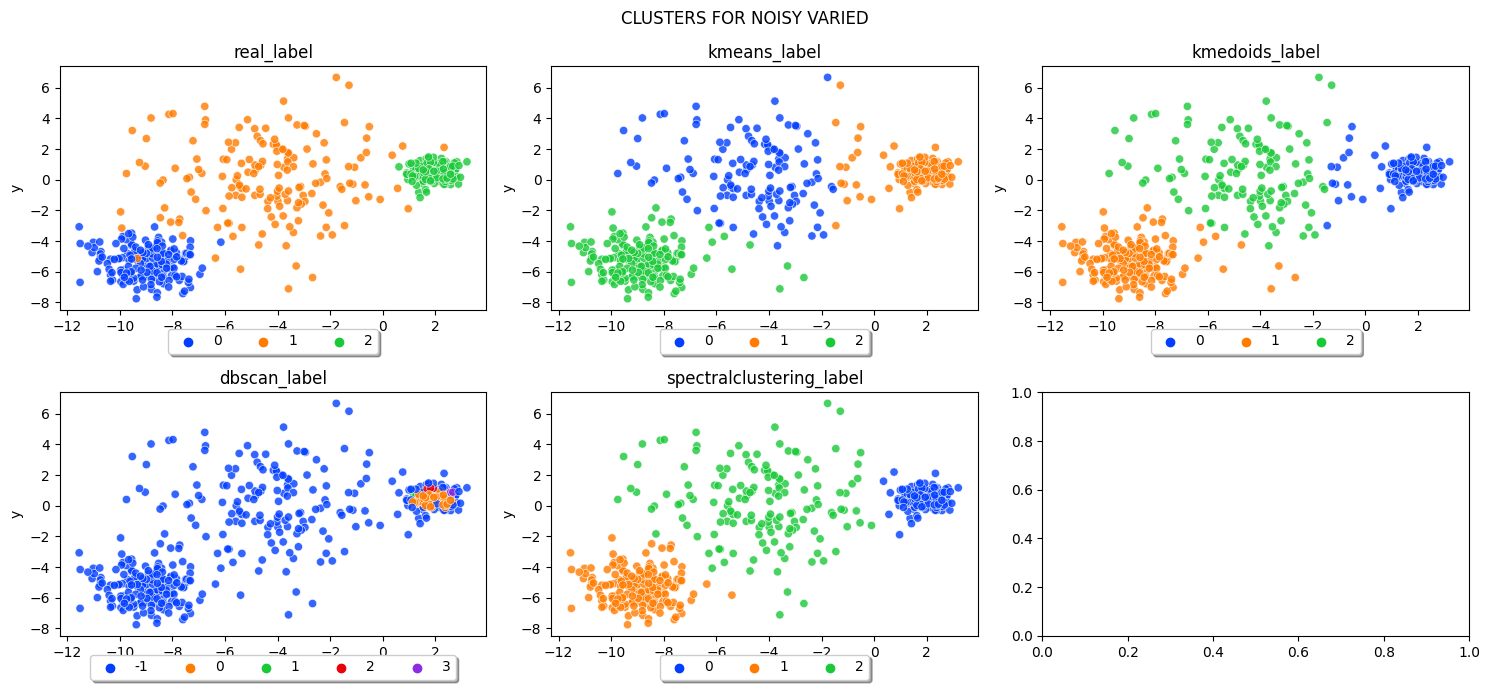

In [13]:
fig, axes = plt.subplots(2,3, figsize = (15,7))
fig.suptitle('Clusters for noisy varied'.upper())

cluster_labels = ['real_label', 'kmeans_label', 'kmedoids_label', 'dbscan_label', 'spectralclustering_label']
i = 0
for row in range(2):
    for col in range(3):
        try:
            axes[row, col].set_title(cluster_labels[i])
            sns.scatterplot(data = varied_df, x = 'x', y = 'y', hue = cluster_labels[i], alpha = 0.8, palette='bright', ax = axes[row, col])
            axes[row,col].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
            i += 1
        except:
            pass
    plt.tight_layout()
plt.show()